# Loading Data

**Documentation:**
* https://www.yelp.com/dataset/documentation/main

**From the documentation the files include the following:**
* business.json - Contains business data including location data, attributes, and categories
* review.json - Contains full review text data including the user_id that wrote the review and the business_id the review is written for.
* user.json - User data including the user's friend mapping and all the metadata associated with the user.
* checkin.json - Checkins on a business.
* tip.json - Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.

As this project focuses on collaborative filtering, will only need the business, user, and review files

**Load Libraries**

In [1]:
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Business Dataset:**

In [2]:
with open("Data/yelp_academic_dataset_business.json", encoding='utf-8') as data_file:
    data = [json.loads(line) for line in data_file]
    for line in data_file:
        data.append(json.loads(line))
    business_df = pd.DataFrame(data)

business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


**User Dataset:**

In [3]:
with open("Data/yelp_academic_dataset_user.json", encoding='utf-8') as data_file:
    data = [json.loads(line) for line in data_file]
    for line in data_file:
        data.append(json.loads(line))
    user_df = pd.DataFrame(data)

user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


**Review Dataset:**

In [4]:
with open("Data/yelp_academic_dataset_review.json", encoding='utf-8') as data_file:
    data = [json.loads(line) for line in data_file]
    for line in data_file:
        data.append(json.loads(line))
    review_df = pd.DataFrame(data)

review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


# Cleaning

**Business Dataset:**

In [5]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [6]:
business_df.isna().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

* Only the descriptive text and hours features have missing values

**User Dataset:**

In [7]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [8]:
user_df.isna().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

**Review Dataset:**

In [9]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [10]:
review_df.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

* No missing values

# EDA

## Business Data

**Businesses Per City:**

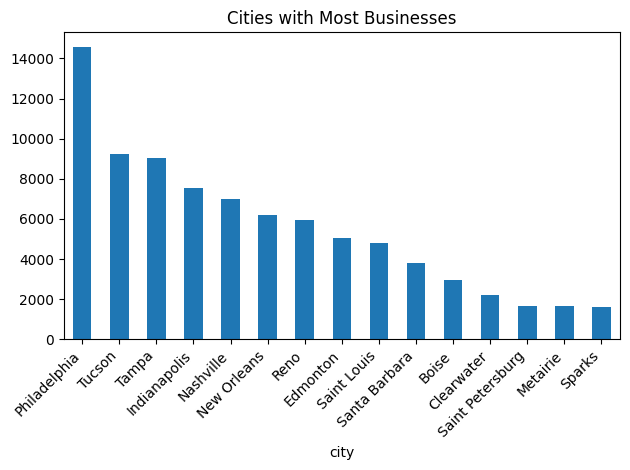

In [11]:
business_per_city = business_df['city'].value_counts()

ax = business_per_city[:15].plot(kind='bar', title='Cities with Most Businesses')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  
plt.tight_layout()
plt.show()

**Frequency of Business Categories:**

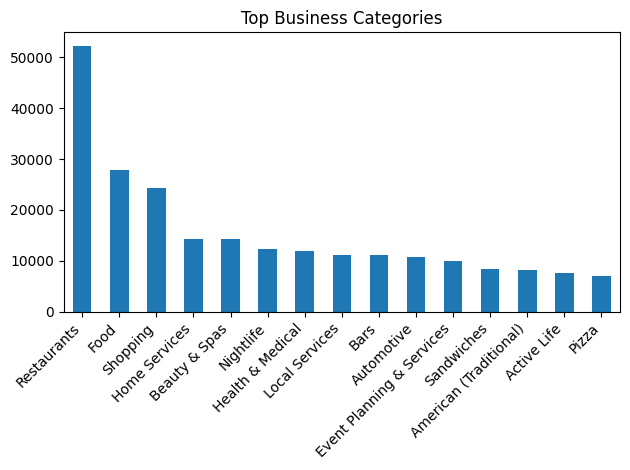

In [12]:
business_categories = business_df['categories']

# Split each string by comma and stack the resulting lists
categories_stacked = business_categories.str.split(', ', expand=True).stack()

# Convert the stacked series to a new DataFrame and reset the index
categories_df = categories_stacked.reset_index(drop=True)

# Display the result
category_counts = categories_df.value_counts()
ax = category_counts[:15].plot(kind='bar', title='Top Business Categories')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Angle the x-tick labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Frequency of Business Attributes:**

<Axes: title={'center': 'Most Frequent Business Attributes'}, xlabel='Attributes'>

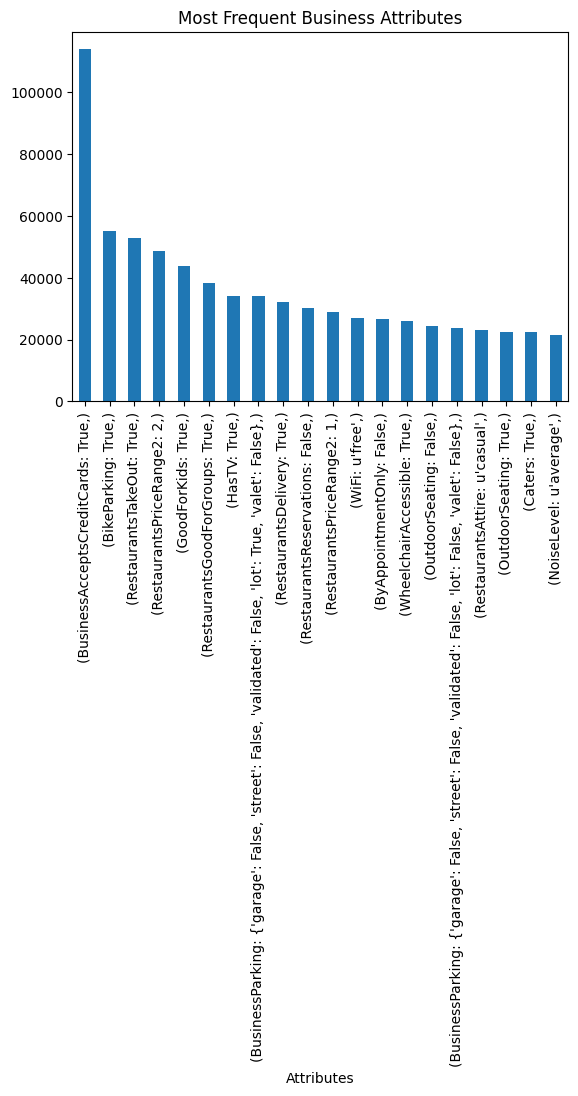

In [13]:
business_attributes = business_df['attributes']

combined_pairs = []

# Iterate over each element in the series
for attributes in business_attributes:
    # Check if the element is a dictionary
    if isinstance(attributes, dict):
        # Extract key-value pairs from the dictionary and append them to the list
        for key, value in attributes.items():
            combined_pairs.append(f"{key}: {value}")

# Create a DataFrame with the combined key-value pairs
result_df = pd.DataFrame({'Attributes': combined_pairs})

attribute_counts = result_df.value_counts()
attribute_counts[:20].plot(kind='bar', 
                  title='Most Frequent Business Attributes')

<Axes: title={'center': 'Reviews Per Business'}, xlabel='Review Count', ylabel='Frequency'>

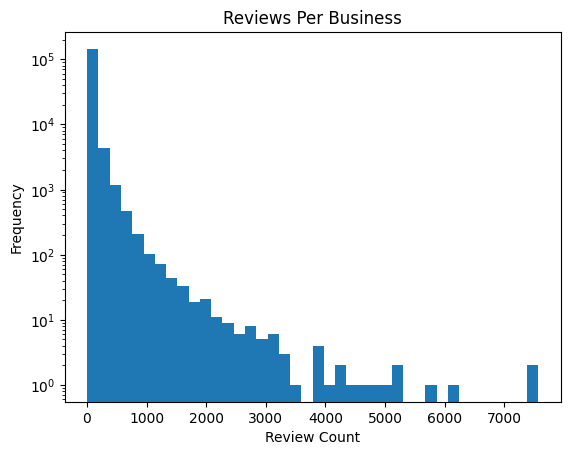

In [14]:
business_df['review_count'].plot(kind='hist', logy=True, bins=40,
                            title='Reviews Per Business',
                            xlabel='Review Count')

**Distribution of business ratings**

<Axes: title={'center': 'Distribution of Stars'}, xlabel='Stars', ylabel='Count'>

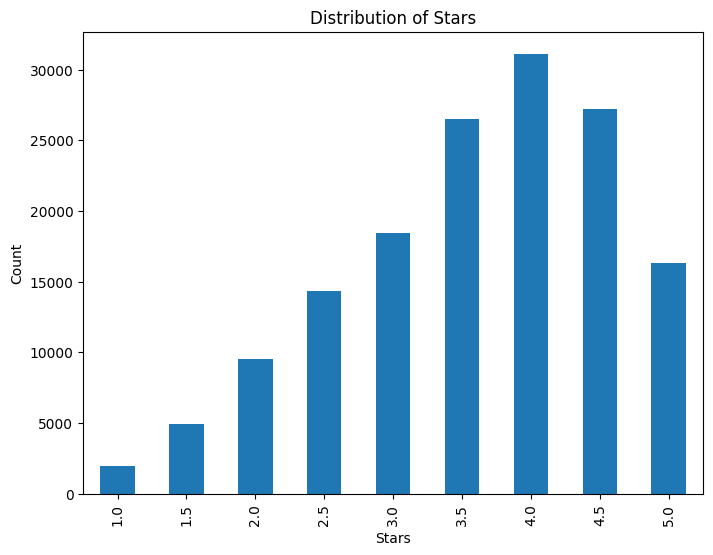

In [15]:
business_stars = business_df['stars'].value_counts()
# Reorder the index from 1 to 5
business_stars_ordered = business_stars.reindex(index=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

plt.figure(figsize=(8, 6))
business_stars_ordered.plot(kind='bar',
                           title='Distribution of Stars',
                           xlabel='Stars',
                           ylabel='Count')

**Observations:**

* Philidelphia has by far the most businesses (it is also the largest city in the dataset by a decent margin as well)
* Restaurants are by for the most frequent kind of businesses in the dataset
* Many of the most frequent attributes are related to restaurants. 
* Most businesses have fewer than 200 reviews, the distribution is heavily skewed towards smaller review counts

## User Data

**Distribution of Reviews Per User**

C:\Users\Jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


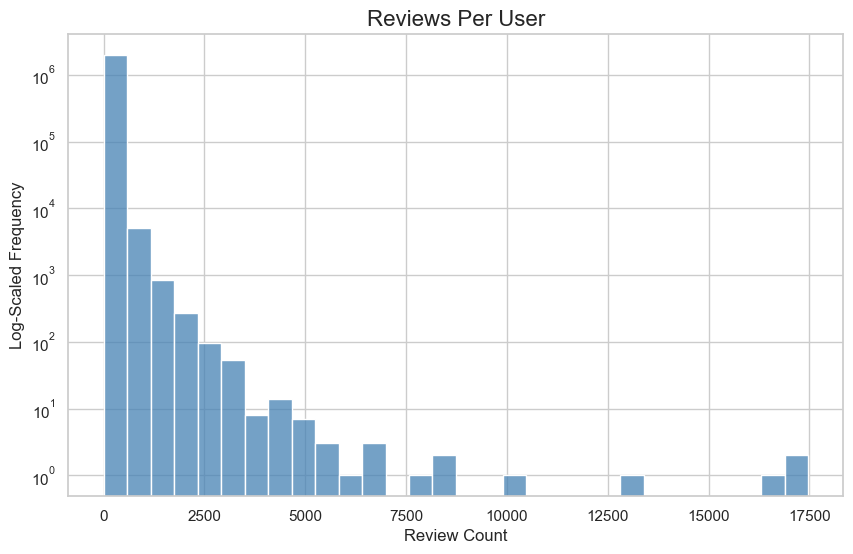

In [16]:
user_df['review_count'] = user_df['review_count'].replace([np.inf, -np.inf], np.nan)
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))  
ax = sns.histplot(user_df['review_count'], bins=30, log_scale=(False, True), color='steelblue')
ax.set_title('Reviews Per User', fontsize=16)  
ax.set_xlabel('Review Count', fontsize=12)  
ax.set_ylabel('Log-Scaled Frequency', fontsize=12)  

# Show the plot
plt.show()

**Average Stars**

<Axes: title={'center': 'Distribution of Avg. User Star Ratings'}, xlabel='Stars', ylabel='Frequency'>

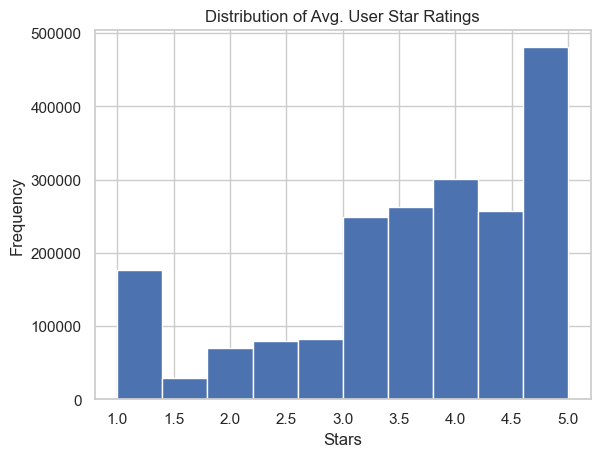

In [17]:
user_df['average_stars'].plot(kind='hist', bins=10,
                            title='Distribution of Avg. User Star Ratings',
                            xlabel='Stars')

## Review Data

<Axes: title={'center': 'Distribution of Review Stars'}, xlabel='Stars', ylabel='Count'>

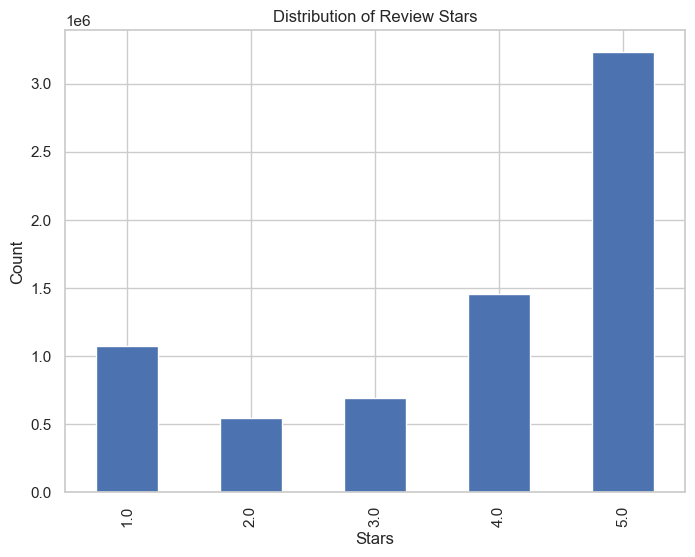

In [18]:
review_stars = review_df['stars'].value_counts()
# Reorder the index from 1 to 5
review_stars_ordered = review_stars.reindex(index=[1.0, 2.0, 3.0, 4.0, 5.0])

plt.figure(figsize=(8, 6))
review_stars_ordered.plot(kind='bar',
                           title='Distribution of Review Stars',
                           xlabel='Stars',
                           ylabel='Count')

<Axes: title={'center': 'Distribution of Total Compliments Per Review'}, xlabel='Compliments', ylabel='Frequency'>

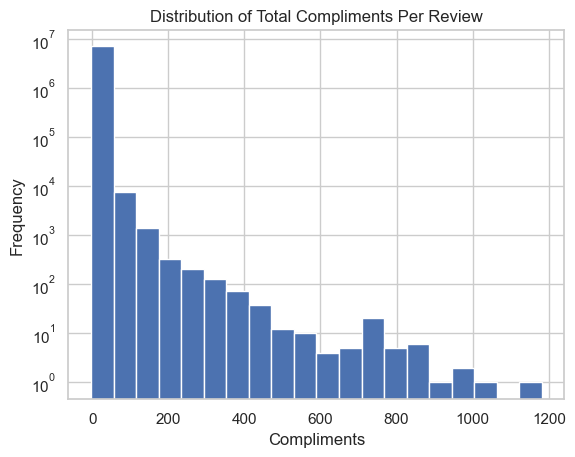

In [19]:
review_df['total_compliments'] = review_df['useful'] + review_df['funny'] + review_df['cool']

review_df['total_compliments'].plot(kind='hist', logy=True, bins=20,
                                   title='Distribution of Total Compliments Per Review',
                                   xlabel='Compliments')

<Axes: title={'center': 'Total Monthly Reviews (2005-2022)'}, xlabel='Date'>

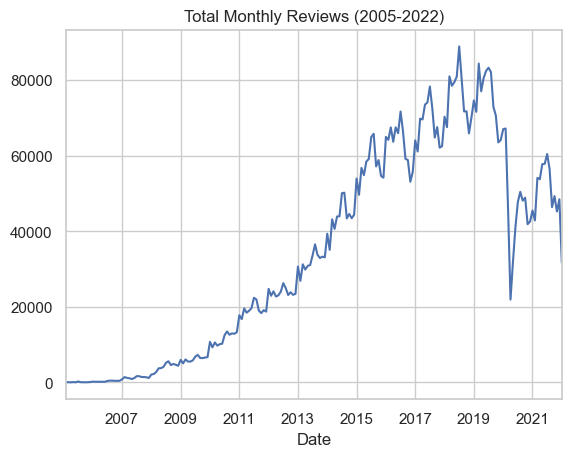

In [20]:
review_df['date']
review_df[['Date', 'Time']] = review_df['date'].str.split(' ', expand=True)
review_df['Date'] = pd.to_datetime(review_df['Date'])
review_df['Time'] = pd.to_datetime(review_df['Time'], format='%H:%M:%S').dt.time

monthly_reviews = review_df['Date'].dt.to_period('M').value_counts().sort_index()
monthly_reviews.plot(title='Total Monthly Reviews (2005-2022)')

In [26]:
review_df['Date'].max()

Timestamp('2022-01-19 00:00:00')

## Combining Datasets

In [21]:
merged_df = pd.merge(review_df, business_df, on='business_id', how='inner', suffixes=('', '_business'))
merged_df = pd.merge(merged_df, user_df, on='user_id', how='inner', suffixes=('', '_user'))
merged_df.head().T

,0,1,2,3,4
review_id,KU_O5udG6zpxOg-VcAEodg,Bqn8psEmvYTO7izrnGNgqg,PBIeDysdBxwY53IFnOPyUw,78MWkzX8uQz0kDnhlhwAAg,krpCZHUj222Ha7AffGUZHQ
user_id,mh_-eMZ6K5RLWhZyISBhwA,mh_-eMZ6K5RLWhZyISBhwA,mh_-eMZ6K5RLWhZyISBhwA,mh_-eMZ6K5RLWhZyISBhwA,mh_-eMZ6K5RLWhZyISBhwA
business_id,XQfwVwDr-v0ZS3_CbbE5Xw,8eDkw7CE0NKqMknPIu26fw,d_tRshM-w6S4QxE4VVi8tQ,mOk3D7VczrDapNuUgLxUQw,L4kfcADLCU4T33i7Z0CkuA
stars,3.0,5.0,3.0,4.0,2.0
useful,0,1,0,2,3
funny,0,0,0,0,0
cool,0,0,0,2,1
text,"If you decide to eat here, just be aware it is...",We tried this place on our first trip to New O...,"Jones is definitely average quality, not many ...",So glad we stumbled upon this restaurant! It i...,I was looking forward to a romantic dinner her...
date,2018-07-07 22:09:11,2018-04-25 17:04:09,2017-03-05 14:26:14,2018-10-29 21:54:59,2018-02-11 03:07:30
total_compliments,0,1,0,4,4


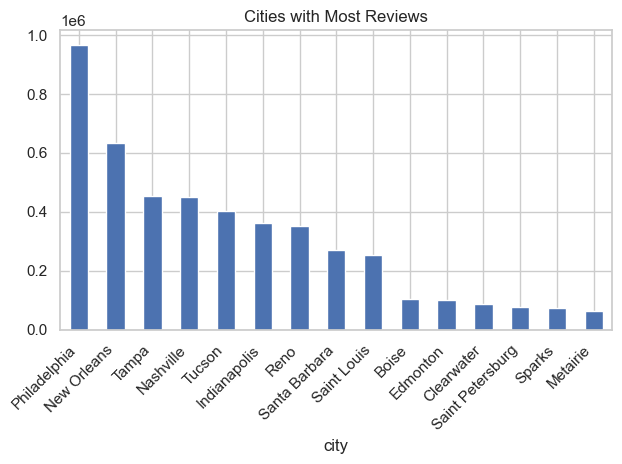

In [22]:
reviews_per_city = merged_df['city'].value_counts()

ax = reviews_per_city[:15].plot(kind='bar', title='Cities with Most Reviews')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

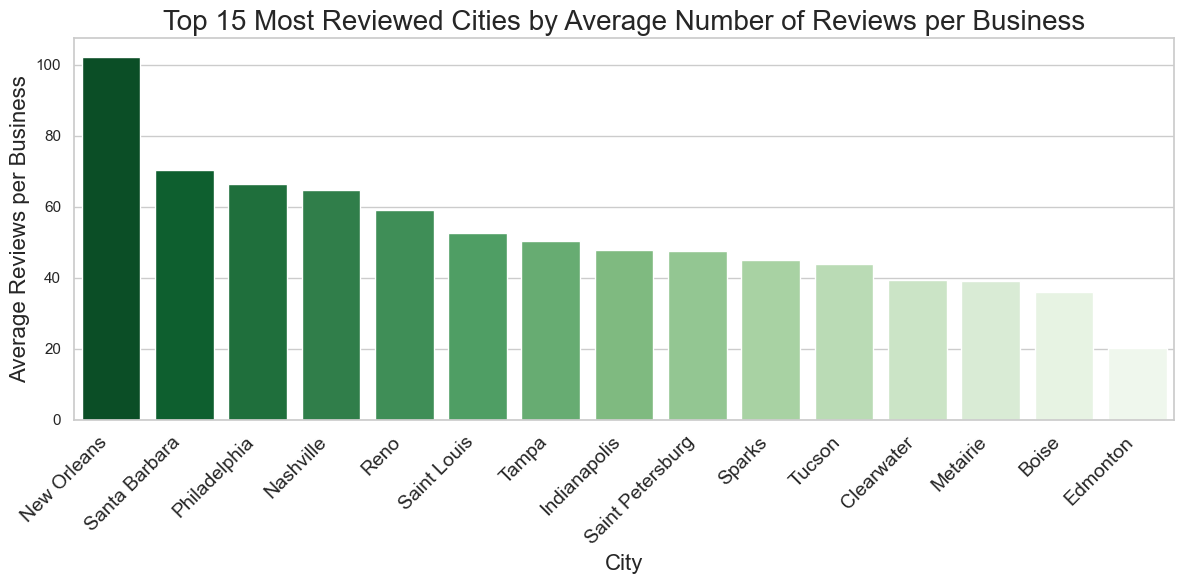

In [23]:
# Calculate the total number of reviews per city
reviews_per_city = merged_df.groupby('city')['review_id'].count()

# Select the top 15 cities based on the number of reviews
top_cities = reviews_per_city.nlargest(15)

# Calculate the total number of businesses per city for the top 15 cities
businesses_per_city = merged_df[merged_df['city'].isin(top_cities.index)].groupby('city')['business_id'].nunique()

# Calculate the average number of reviews per business in each city
avg_reviews_per_business = reviews_per_city / businesses_per_city

# Sort the top cities based on the average number of reviews per business
sorted_top_cities = avg_reviews_per_business[top_cities.index].sort_values(ascending=False)
sorted_top_cities_df = sorted_top_cities.reset_index()
sorted_top_cities_df.columns = ['City', 'Average Reviews per Business']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  
ax = sns.barplot(x='City', y='Average Reviews per Business', data=sorted_top_cities_df, palette="Greens_r")
ax.set_title('Top 15 Most Reviewed Cities by Average Number of Reviews per Business', fontsize=20)
ax.set_xlabel('City', fontsize=16)
ax.set_ylabel('Average Reviews per Business', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)  

# Show the plot
plt.tight_layout()  
plt.show()

# Focusing Scope

* Since restaurants are the most frequent kind of business, will focus on those
* New Orleans has the most reviews per business, so will focus on restaurant reviews in that city
* Will only look at reviews since 2017 (most recent 5 years of reviews)

In [27]:
new_orleans_df = merged_df[merged_df['city'] == 'New Orleans']
restaurant_df = new_orleans_df[new_orleans_df['categories'].str.contains('restaurant', case=False, na=False)]
filtered_df = restaurant_df[restaurant_df['Date'] >= '2017-01-01']

In [28]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249261 entries, 1 to 6990199
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_id           249261 non-null  object        
 1   user_id             249261 non-null  object        
 2   business_id         249261 non-null  object        
 3   stars               249261 non-null  float64       
 4   useful              249261 non-null  int64         
 5   funny               249261 non-null  int64         
 6   cool                249261 non-null  int64         
 7   text                249261 non-null  object        
 8   date                249261 non-null  object        
 9   total_compliments   249261 non-null  int64         
 10  Date                249261 non-null  datetime64[ns]
 11  Time                249261 non-null  object        
 12  name                249261 non-null  object        
 13  address             249261 non-nu

C:\Users\Jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


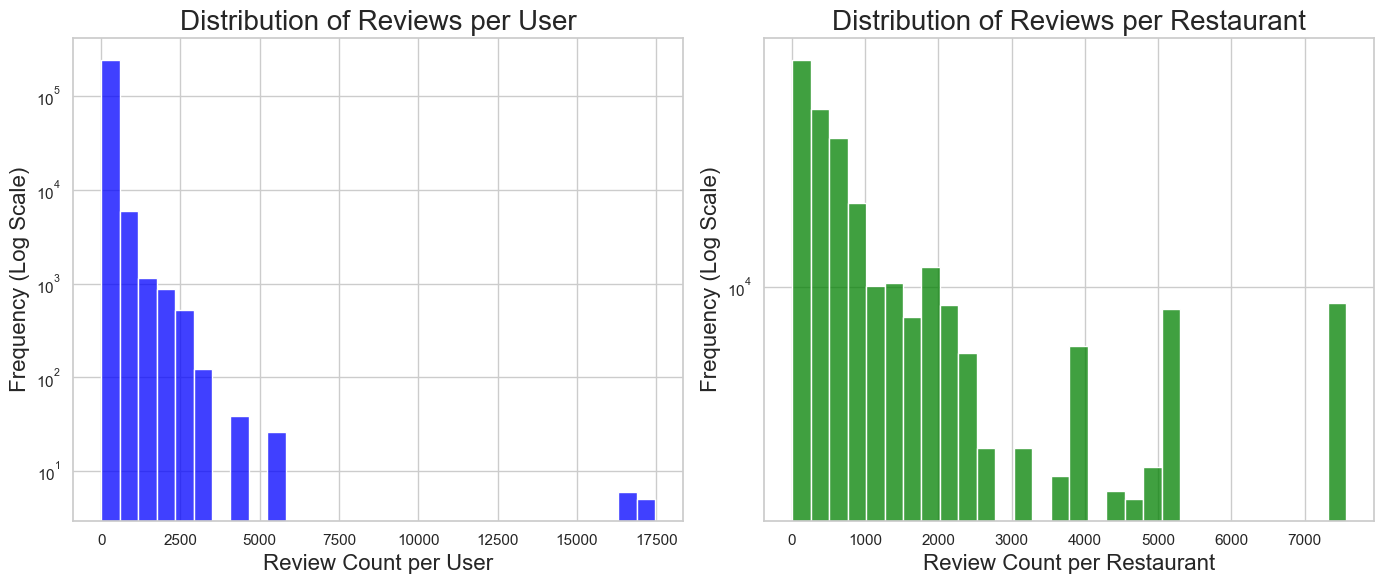

In [31]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Histogram for Reviews per User
sns.histplot(data=filtered_df, x='review_count_user', bins=30, ax=axes[0], color='blue', log_scale=(False, True))
axes[0].set_title('Distribution of Reviews per User', fontsize=20)
axes[0].set_xlabel('Review Count per User', fontsize=16)
axes[0].set_ylabel('Frequency (Log Scale)', fontsize=16)

# Histogram for Reviews per Business
sns.histplot(data=filtered_df, x='review_count', bins=30, ax=axes[1], color='green', log_scale=(False, True))
axes[1].set_title('Distribution of Reviews per Restaurant', fontsize=20)
axes[1].set_xlabel('Review Count per Restaurant', fontsize=16)
axes[1].set_ylabel('Frequency (Log Scale)', fontsize=16)

# Display the plot
plt.tight_layout()  
plt.show()

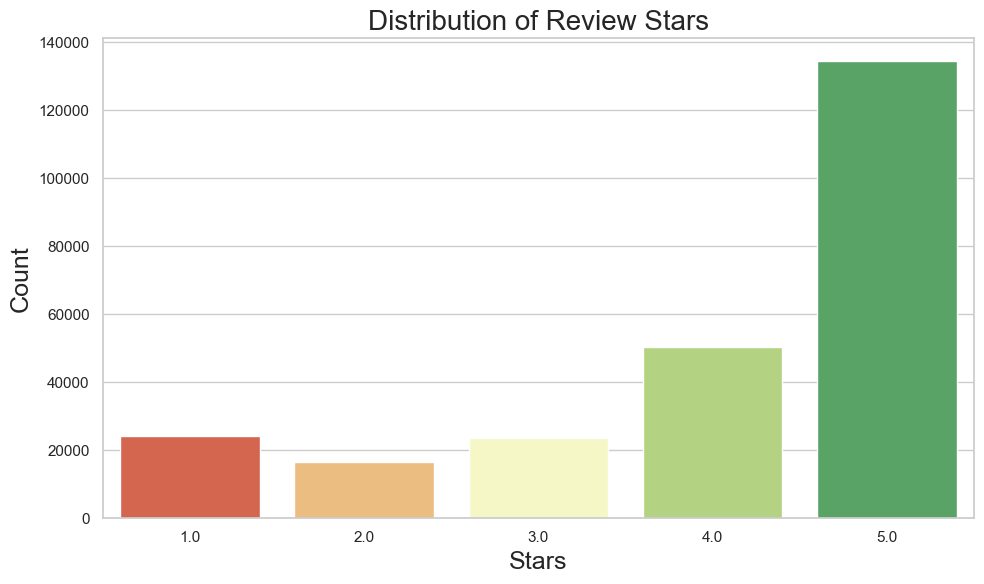

In [32]:
review_stars = filtered_df['stars'].value_counts()
# Reorder the index from 1 to 5
review_stars_ordered = review_stars.reindex(index=[1.0, 2.0, 3.0, 4.0, 5.0])


review_stars_df = pd.DataFrame({'Stars': review_stars_ordered.index, 'Count': review_stars_ordered.values})

sns.set(style="whitegrid")

colors = sns.color_palette("RdYlGn", len(review_stars_ordered.index))
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Stars', y='Count', data=review_stars_df, palette=colors)

ax.set_title('Distribution of Review Stars', fontsize=20)
ax.set_xlabel('Stars', fontsize=18)
ax.set_ylabel('Count', fontsize=18)

plt.tight_layout()

plt.show()

**Dropping Unecessary Features:**

In [72]:
cleaned_df = filtered_df[['user_id', 'business_id', 'review_id', 'name', 'name_user', 'review_count', 'review_count_user',
                         'stars_business', 'average_stars', 'stars']]

cleaned_df = cleaned_df.rename(columns={"name" : "name_business", 
                           "average_stars" : "average_stars_user", 
                           "review_count" : "review_count_business", 
                           "stars_business" : "average_stars_business",
                           "average_stars" : "average_stars_user",
                           "stars" : "stars_review"})
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249261 entries, 1 to 6990199
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 249261 non-null  object 
 1   business_id             249261 non-null  object 
 2   review_id               249261 non-null  object 
 3   name_business           249261 non-null  object 
 4   name_user               249261 non-null  object 
 5   review_count_business   249261 non-null  int64  
 6   review_count_user       249261 non-null  int64  
 7   average_stars_business  249261 non-null  float64
 8   average_stars_user      249261 non-null  float64
 9   stars_review            249261 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 20.9+ MB


**Averaging Repeated visits to same restaurant:**

In [73]:
cleaned_df = cleaned_df.groupby(['user_id', 'business_id'], as_index=False).agg({
    'review_id': 'first',
    'name_business': 'first',
    'name_user': 'first',
    'review_count_business': 'first',
    'review_count_user': 'first',
    'average_stars_user': 'first',
    'average_stars_business': 'first',
    'stars_review': 'mean'
})

**Saving to file:**

In [75]:
cleaned_df.to_pickle("clean_df.pkl")

## Analyzing text reviews of New Orleans Restaurants (1/1/2017-1/1/2022)

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams

import re
import string
from wordcloud import WordCloud
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

import dask
import dask.dataframe as dd
from dask.distributed import Client
from dask import delayed
import dask.bag as db

In [75]:
# subset of columns relevant to content based filtering using the text reviews
text_df = filtered_df[['review_id', 'user_id', 'business_id', 'name', 'name_user', 'stars', 'text']]
text_df = text_df.rename(columns={"name" : "name_business"})
text_df.head()

,review_id,user_id,business_id,name_business,name_user,stars,text
1,Bqn8psEmvYTO7izrnGNgqg,mh_-eMZ6K5RLWhZyISBhwA,8eDkw7CE0NKqMknPIu26fw,Two Chicks Cafe,Melanie,5.0,We tried this place on our first trip to New O...
135,kuEb-5dKF5NDGnkbbbVuJw,ejFxLGqQcWNLdNByJlIhnQ,gzMlFR9ViVCr_HUYPgqqVg,Sylvain,Stella,4.0,Had such a great dinner at Sylvain with my co-...
1504,Iy3a77JH4xhVgNEmIDDCiw,5itRTlCho6A9JRXjFhPPxQ,5bT-bq-u8rEjBopZg4LCeQ,Dry Dock Cafe,Nic,4.0,Stopped by for lunch. The catfish and hushpupp...
1510,6812Q9bQguZBfjxFjxMOIw,5itRTlCho6A9JRXjFhPPxQ,iXPEyHqvaDUWLn4pw-58Fw,Envie Espresso Bar & Cafe,Nic,5.0,"This place had good coffee, friendly staff, an..."
2629,axF4Eum3ns1oneghp7Mj3w,s0M8VttOEQPtoq4yF_1DoQ,6Ty-KKWq6hLZYW8DWEHYvg,Pat O'Brien’s,John,5.0,Pat O's is an icon of the French quarter. Pla...


**Will average the star rating of repeat visits by the same user to a restaurant and concatenate the text reviews:**

In [76]:
text_df = text_df.groupby(['user_id', 'business_id'], as_index=False).agg({
    'review_id': 'first',
    'name_business': 'first',
    'name_user': 'first',
    'stars': 'mean',
    'text': lambda x: ' '.join(x)
})

**Processing text reviews:**

In [77]:
def preprocess_text(text):
    # Lowercase and remove non-alphanumeric characters
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)  # Join tokens back into a string

In [78]:
text_df['text_cleaned'] = text_df['text'].apply(lambda x: preprocess_text(x))

In [79]:
text_df.head()

,user_id,business_id,review_id,name_business,name_user,stars,text,text_cleaned
0,---UgP94gokyCDuB5zUssA,LY6hHivaMJIPJNv_3oBIPQ,bk8w-9nDgwo6BKc_EHaLbw,Vegan Wit A Twist,Leonel,1.0,So I'd like to say that I wasn't impressed wit...,id like say wasnt impressed food concept great...
1,---UgP94gokyCDuB5zUssA,hLlDzRaDGN-0SlEWk0xTpQ,qPTKpavihJ0SolwWYKTQuQ,Breads on Oak Cafe & Bakery,Leonel,5.0,So this was my first time along with my wife a...,first time along wife location people working ...
2,--48iehfEvtnSrLq8grJIQ,2HMf3ewAeMaeDsadJuL8DQ,wKrO-jGM7AClF5eZAJxgQg,Old Absinthe House,Tim,4.0,Come here for a classic. Absinthe frappe. Ramo...,come classic absinthe frappe ramos fizz dont s...
3,--48iehfEvtnSrLq8grJIQ,UeYZgcORV2Veo_BZzdiaTg,evAAJZmeiBtVPvpsKJitjA,Napoleon House,Tim,4.0,Historic spot in the quarter. Recommend the En...,historic spot quarter recommend english pimms ...
4,--48iehfEvtnSrLq8grJIQ,gTC8IQ_i8zXytWSly3Ttvg,A9IDG1yKFvusZbLkbIjevw,Cochon Butcher,Tim,5.0,Excellent place for a sandwich and a soda or b...,excellent place sandwich soda beer carolina pu...


**Creating Bigrams Wordcloud of All reviews:**

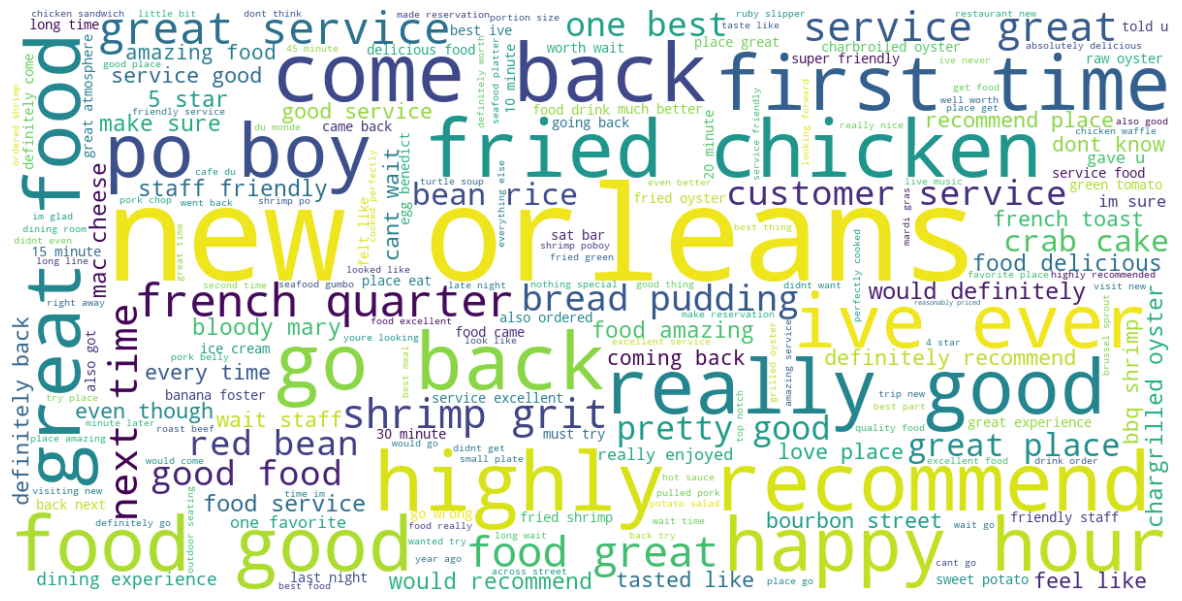

In [72]:
def generate_bigrams(tokens):
    return list(bigrams(tokens))

def count_bigrams(partition):
    # Tokenize
    tokens = partition['text_cleaned'].str.split()
    # Generate bigrams
    bigram_list = tokens.apply(lambda x: list(bigrams(x)))
    # Flatten the list of lists to a single list of bigrams
    flat_list = [item for sublist in bigram_list for item in sublist if item]
    # Count occurrences
    counts = {}
    for bigram in flat_list:
        bigram_str = ' '.join(bigram)
        if bigram_str in counts:
            counts[bigram_str] += 1
        else:
            counts[bigram_str] = 1
    return pd.Series(counts, name='count')

# Load data into a Dask DataFrame
ddf = dd.from_pandas(text_df, npartitions=10)

# Define the metadata as a Series of integers
meta = pd.Series(dtype=int)

# Apply the counting function to each partition
bigram_series = ddf.map_partitions(count_bigrams, meta=meta)

# Convert series of dictionaries to a DataFrame and perform groupby sum
bigram_counts_df = bigram_series.to_frame(name='count')
grouped_bigram_counts = bigram_counts_df.groupby(bigram_counts_df.index).sum()
final_bigram_counts = grouped_bigram_counts.compute()

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(final_bigram_counts['count'].to_dict())

# Plot and save
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('bigram_wordcloud.png', bbox_inches='tight')
plt.show()

**Creating wordcloud of 1-Star reviews:**

In [73]:
one_stars = text_df[text_df['stars'] <= 1.0]

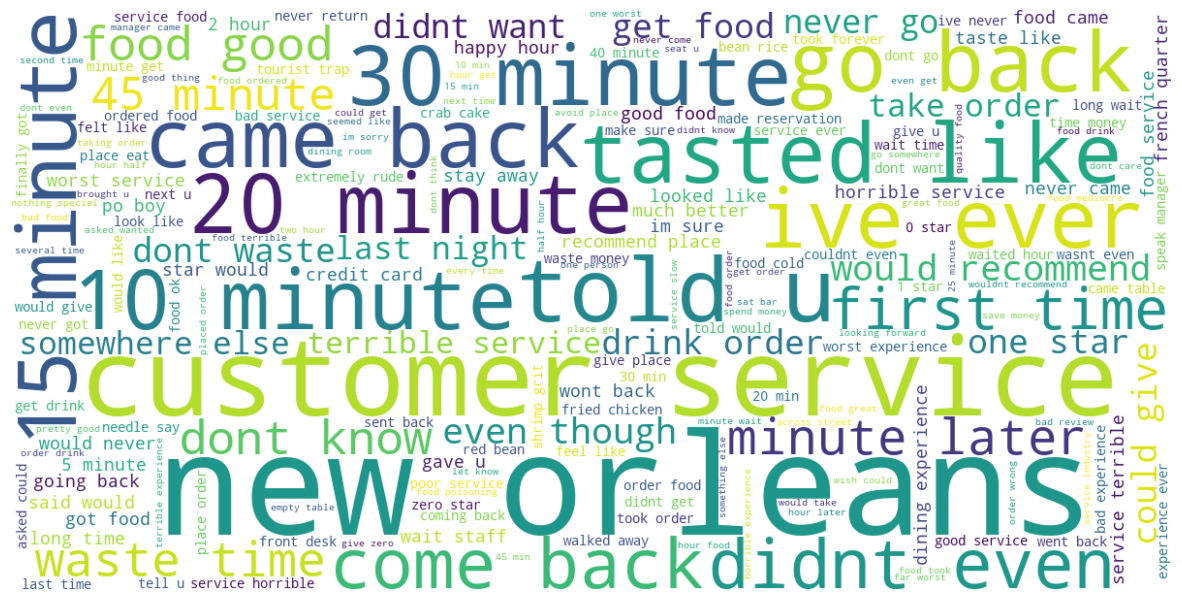

In [74]:
# Load data into a Dask DataFrame
ddf = dd.from_pandas(one_stars, npartitions=10)

# Define the metadata as a Series of integers
meta = pd.Series(dtype=int)

# Apply the counting function to each partition
bigram_series = ddf.map_partitions(count_bigrams, meta=meta)

# Convert series of dictionaries to a DataFrame and perform groupby sum
bigram_counts_df = bigram_series.to_frame(name='count')
grouped_bigram_counts = bigram_counts_df.groupby(bigram_counts_df.index).sum()
final_bigram_counts = grouped_bigram_counts.compute()

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(final_bigram_counts['count'].to_dict())

# Plot and save
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('onestar_wordcloud.png', bbox_inches='tight')
plt.show()